# Haridas_Indrajit_InClasLab3

### Preamble

In [1]:
# Load libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
# Loaad dataset
df = pd.read_csv('Batting.csv')
df.head()

,playerID,nameFirst,nameLast,birthYear,yearID,stint,teamID,lgID,G,AB,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,abercda01,Frank,Abercrombie,1850,1871,1,TRO,NaN,1,4,...,0.0,0.0,0.0,0,0.0,NaN,NaN,NaN,NaN,NaN
1,addybo01,Bob,Addy,1842,1871,1,RC1,NaN,25,118,...,13.0,8.0,1.0,4,0.0,NaN,NaN,NaN,NaN,NaN
2,allisar01,Art,Allison,1849,1871,1,CL1,NaN,29,137,...,19.0,3.0,1.0,2,5.0,NaN,NaN,NaN,NaN,NaN
3,allisdo01,Doug,Allison,1846,1871,1,WS3,NaN,27,133,...,27.0,1.0,1.0,0,2.0,NaN,NaN,NaN,NaN,NaN
4,ansonca01,Cap,Anson,1852,1871,1,RC1,NaN,25,120,...,16.0,6.0,2.0,2,1.0,NaN,NaN,NaN,NaN,NaN


### Viz1

Let's see how all the predictive attributes are correlated!

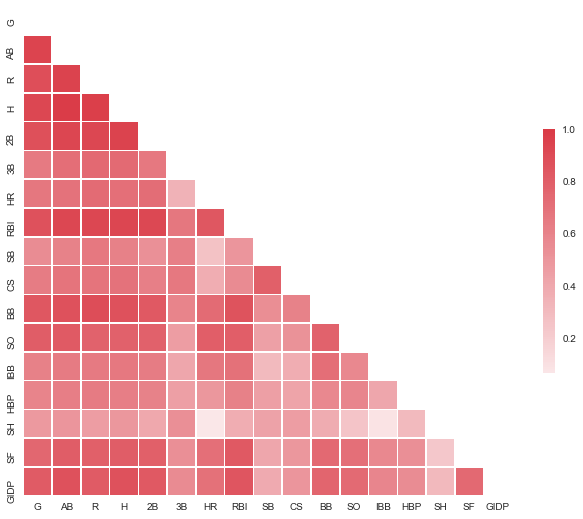

In [16]:
sns.set(style="white")

d = df[['G', 'AB', 'R', 'H', '2B', '3B', 'HR', 'RBI', 'SB',
       'CS', 'BB', 'SO', 'IBB', 'HBP', 'SH', 'SF', 'GIDP']]

# Compute the correlation matrix
corr = d.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Here we try to plot correlation matrix to understand how predictive attributes are related.

### Viz 2

In [17]:
# Groupby using year and player
agg_df = df.groupby(['playerID', 'teamID'], as_index=False).sum()

Text(0,0.5,'Home Runs')

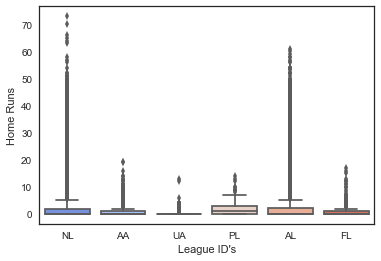

In [21]:
ax = sns.boxplot(x="lgID", y="HR", data=df, palette="coolwarm")
ax.set_xlabel("League ID's")
ax.set_ylabel('Home Runs')

As we can see; NL, PL and AL have high 3rd quartile and PL seem to have highest medians.

Although the range of 3rd quartile for various leagues are comparable, outliers in NL and AL are too many. Good betting opportunity?

### Viz 3

Text(0,0.5,'Number of Home Runs')

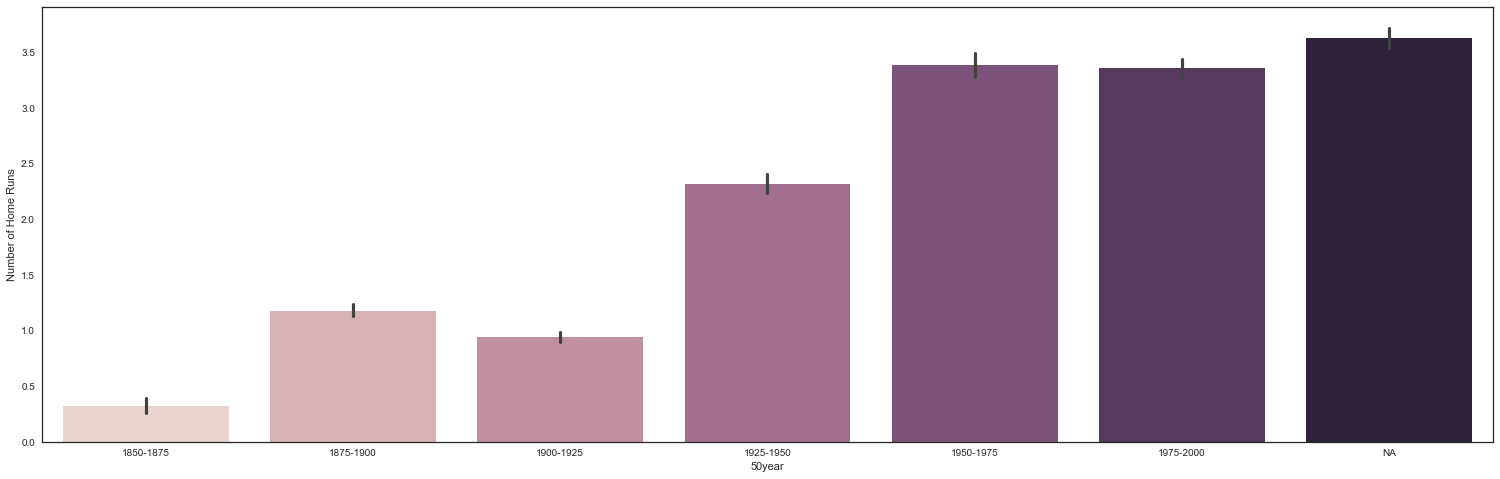

In [20]:
df['50year'] = np.where((df['yearID'] >= 1800) & (df['yearID'] < 1850), '1800-1850',
                       np.where((df['yearID'] >= 1850) & (df['yearID'] < 1875), '1850-1875', 
                               np.where((df['yearID'] >= 1875) & (df['yearID'] < 1900), '1875-1900', 
                                       np.where((df['yearID'] >= 1900) & (df['yearID'] < 1925), '1900-1925',
                                               np.where((df['yearID'] >= 1925) & (df['yearID'] < 1950), '1925-1950',
                                                       np.where((df['yearID'] >= 1950) & (df['yearID'] < 1975), '1950-1975',
                                                               np.where((df['yearID'] >= 1975) & (df['yearID'] < 2000), '1975-2000','NA')))))))

f, ax = plt.subplots(figsize=(26, 8))
agg_df = df.groupby('50year', as_index=False).sum()
sns.barplot(x='50year',y='HR',data=df, ax = ax, palette=sns.cubehelix_palette(7))
plt.ylabel('Number of Home Runs')

We created brackets of 25 years. 

As we can see, number of HomeRuns have increasing trend over every 25 years. Although there are a lot of 'Not Available' years. Hence, this can be misleading.

### Viz 4

Text(0.5,1,'Distribution Plot for HR')

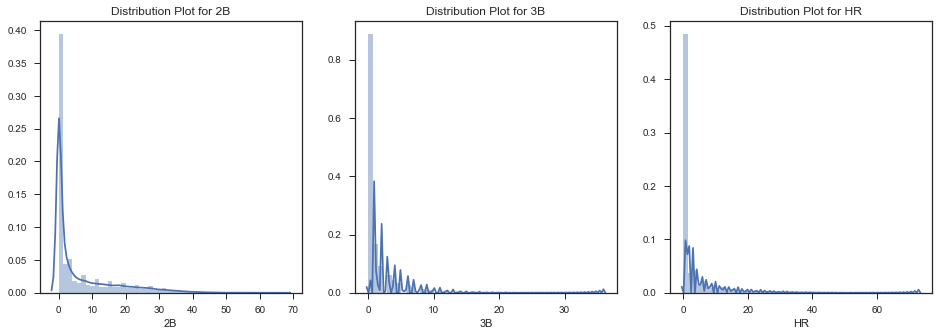

In [12]:
# Set up the matplotlib figure
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 5))

x1 = np.array(df['2B'])
x2 = np.array(df['3B'])
x3 = np.array(df['HR'])

sns.distplot(x1, ax = ax1, axlabel = '2B')
ax1.set_title('Distribution Plot for 2B')
sns.distplot(x2, ax = ax2, axlabel = '3B')
ax2.set_title('Distribution Plot for 3B')
sns.distplot(x3, ax = ax3, axlabel = 'HR')
ax3.set_title('Distribution Plot for HR')

### Viz 5

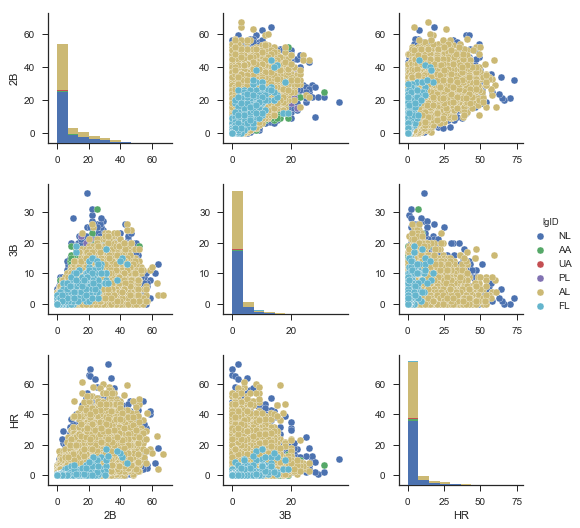

In [10]:
sns.set(style="ticks")

df = df[['2B', '3B', 'HR', 'lgID']]
sns.pairplot(df, hue="lgID")

This graph utilizes information from previous graphs that home runs in various leagues are different.

Hence, here we have tries to re-create Viz 4 with regards to different leagues.